In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('grades.csv')

columns = df.columns
print(columns)

Index(['Semester', 'Student ID', 'Name', 'Section', 'Homework 1', 'Homework 2',
       'Homework 3', 'Homework 4', 'Homework 5', 'Peer Evaluations', 'Bonus',
       'Quiz 01', 'Quiz 02', 'Quiz 03', 'Quiz 04', 'Quiz 05', 'Quiz 06',
       'Quiz 07', 'Quiz 08', 'Quiz 09', 'Quiz 10', 'Quiz 11', 'Quiz 12',
       'Quiz Adjustment', 'Drop Lowest Quiz 1', 'Drop Lowest Quiz 2',
       'Final Exam', 'Total Score', 'Letter Grade'],
      dtype='object')


In [101]:
# Task 2: Missing values
fill_zero_columns = ['Homework 1', 'Homework 2', 'Homework 3', 'Homework 4', 'Homework 5', 'Peer Evaluations', 'Bonus', 'Quiz 01', 'Quiz 02', 'Quiz 03', 'Quiz 04', 'Quiz 05', 'Quiz 06', 'Quiz 07', 'Quiz 08', 'Quiz 09', 'Quiz 10', 'Quiz 11', 'Quiz 12', 'Quiz Adjustment', 'Final Exam']
fill_attributes_values_pair = dict(zip(fill_zero_columns, [0]*len(fill_zero_columns)))
filled_df = df.fillna(value=fill_attributes_values_pair)


In [108]:
# Task 3: Re-encoding
# categorical_features = ['semester']
# df_cat = pd.get_dummies(df[categorical_features])
# df = df.drop(categorical_features, axis=1)
# df = pd.concat([df, df_cat], axis=1)

df['ClassID'] = df.groupby(['Semester','Section']).ngroup()
df

,Semester,Student ID,Name,Section,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Peer Evaluations,...,Quiz 11,Quiz 12,Quiz Adjustment,Drop Lowest Quiz 1,Drop Lowest Quiz 2,Final Exam,Total Score,Letter Grade,Class,ClassID
0,F18,457364,Youyang,8,32.0,40.0,34.0,34.0,42.0,150.0,...,47.0,13.0,NaN,-13,-22.0,123.0,841.0,B,25,25
1,F18,950536,Tait,2,35.0,40.0,34.0,32.0,40.0,150.0,...,46.0,46.0,NaN,0,-15.0,99.0,773.5,C+,19,19
2,F18,524131,Hafeez,1,39.0,40.0,42.0,29.0,42.0,150.0,...,40.0,8.0,NaN,-8,-19.0,117.0,834.0,B,18,18
3,F18,791499,Madhura,4,38.0,40.0,37.0,34.0,40.0,NaN,...,30.0,34.0,NaN,-18,-23.0,117.0,696.0,D+,21,21
4,F18,273342,Jeeyong,1,38.0,40.0,42.0,38.0,42.0,150.0,...,50.0,47.0,NaN,-34,-38.0,132.0,956.0,A,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,F16,707336,Marcela,4,43.0,43.0,40.0,37.0,41.0,150.0,...,NaN,28.0,NaN,0,-4.0,60.0,676.0,D+,4,4
780,F16,593244,Hyungseok,3,34.0,38.0,42.0,43.0,44.0,150.0,...,46.0,46.0,NaN,-32,-37.0,129.0,934.0,A,3,3
781,F16,578133,Kartick,3,40.0,41.0,44.0,44.0,43.0,150.0,...,44.0,42.0,NaN,-13,-19.0,96.0,856.0,B,3,3
782,F16,887441,Madhavshree,1,34.0,43.0,42.0,37.0,42.0,150.0,...,37.0,15.0,NaN,-15,-20.0,99.0,815.0,B-,1,1


In [103]:
# Task 4: Scaling and z-scoring
# from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

scoretype_attributes = ['Homework 1', 'Homework 2',
       'Homework 3', 'Homework 4', 'Homework 5', 'Peer Evaluations', 'Bonus',
       'Quiz 01', 'Quiz 02', 'Quiz 03', 'Quiz 04', 'Quiz 05', 'Quiz 06',
       'Quiz 07', 'Quiz 08', 'Quiz 09', 'Quiz 10', 'Quiz 11', 'Quiz 12',
       'Quiz Adjustment', 'Final Exam', 'Total Score']

for score_attri in scoretype_attributes:
    attri_scaled = 'Scaled ' + score_attri
    attri_normed_all_semester = 'Normed ' + score_attri + ' in All Semesters'
    attri_normed_same_semester = 'Normed' + score_attri + ' in the Same Semester'

    filled_df[attri_scaled] = (filled_df[score_attri] - filled_df[score_attri].min()) / (filled_df[score_attri].max() - filled_df[score_attri].min()) * 100

    filled_df[attri_normed_all_semester] = (filled_df[score_attri] - filled_df[score_attri].mean()) / filled_df[score_attri].std()

    filled_df[attri_normed_same_semester] = filled_df.groupby(['Semester'])[score_attri].transform(lambda x: zscore(x, ddof=0))

filled_df


/Users/cuihejie/anaconda3/envs/d2l/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,Semester,Student ID,Name,Section,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Peer Evaluations,...,NormedQuiz 12 in the Same Semester,Scaled Quiz Adjustment,Normed Quiz Adjustment in All Semesters,NormedQuiz Adjustment in the Same Semester,Scaled Final Exam,Normed Final Exam in All Semesters,NormedFinal Exam in the Same Semester,Scaled Total Score,Normed Total Score in All Semesters,NormedTotal Score in the Same Semester
0,F18,457364,Youyang,8,32.0,40.0,34.0,34.0,42.0,150.0,...,-1.036336,0.0,-0.112118,NaN,83.673469,0.601593,0.454389,84.10,0.226223,0.158432
1,F18,950536,Tait,2,35.0,40.0,34.0,32.0,40.0,150.0,...,0.860147,0.0,-0.112118,NaN,67.346939,-0.151239,-0.318390,77.35,-0.136959,-0.204316
2,F18,524131,Hafeez,1,39.0,40.0,42.0,29.0,42.0,150.0,...,-1.323682,0.0,-0.112118,NaN,79.591837,0.413385,0.261194,83.40,0.188560,0.120813
3,F18,791499,Madhura,4,38.0,40.0,37.0,34.0,40.0,0.0,...,0.170517,0.0,-0.112118,NaN,79.591837,0.413385,0.261194,69.60,-0.553947,-0.620804
4,F18,273342,Jeeyong,1,38.0,40.0,42.0,38.0,42.0,150.0,...,0.917617,0.0,-0.112118,NaN,89.795918,0.883905,0.744181,95.60,0.844979,0.776447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,F16,707336,Marcela,4,43.0,43.0,40.0,37.0,41.0,150.0,...,-0.722050,0.0,-0.112118,NaN,40.816327,-1.374591,-1.449133,67.60,-0.661557,-0.772435
780,F16,593244,Hyungseok,3,34.0,38.0,42.0,43.0,44.0,150.0,...,0.396699,0.0,-0.112118,NaN,87.755102,0.789801,1.028187,93.40,0.726608,0.761756
781,F16,578133,Kartick,3,40.0,41.0,44.0,44.0,43.0,150.0,...,0.148088,0.0,-0.112118,NaN,65.306122,-0.245343,-0.156618,85.60,0.306931,0.297931
782,F16,887441,Madhavshree,1,34.0,43.0,42.0,37.0,42.0,150.0,...,-1.530035,0.0,-0.112118,NaN,67.346939,-0.151239,-0.048909,81.50,0.086331,0.054125


In [104]:
# Task 5: Finding out the basic statistics(mean, standard deviation, and 5-number summary) on each attribute where it make sense to do so.
statistics_attributes = ['Homework 1', 'Homework 2',
       'Homework 3', 'Homework 4', 'Homework 5', 'Peer Evaluations', 
       'Quiz 01', 'Quiz 02', 'Quiz 03', 'Quiz 04', 'Quiz 05', 'Quiz 06',
       'Quiz 07', 'Quiz 08', 'Quiz 09', 'Quiz 10', 'Quiz 11', 'Quiz 12',
       'Drop Lowest Quiz 1', 'Drop Lowest Quiz 2',
       'Final Exam', 'Total Score']
filled_df[statistics_attributes].describe()
print_attr = ['Attribute', 'Mean', 'Std', 'Min', '25\\%', '50\\%', '75\\%', 'Max']

des = filled_df[statistics_attributes].describe()
print(' & '.join(print_attr), '\\\\','\\midrule')

for g in statistics_attributes:
    d = des[g].tolist()
    d = [f'{v:.1f}' for v in d[1:]]
    d = [g]+d 
    print(' & '.join(d), '\\\\')

Attribute & Mean & Std & Min & 25\% & 50\% & 75\% & Max \\ \midrule
Homework 1 & 36.9 & 9.1 & 0.0 & 36.0 & 40.0 & 42.0 & 44.0 \\
Homework 2 & 37.2 & 8.4 & 0.0 & 37.0 & 40.0 & 41.0 & 44.0 \\
Homework 3 & 36.2 & 9.5 & -7.0 & 35.0 & 40.0 & 42.0 & 44.0 \\
Homework 4 & 36.5 & 9.8 & -3.0 & 37.0 & 40.0 & 42.0 & 44.0 \\
Homework 5 & 37.9 & 11.0 & 0.0 & 40.0 & 42.0 & 42.0 & 44.0 \\
Peer Evaluations & 139.1 & 35.9 & 0.0 & 150.0 & 150.0 & 150.0 & 150.0 \\
Quiz 01 & 37.8 & 12.5 & 0.0 & 29.0 & 42.0 & 49.0 & 50.0 \\
Quiz 02 & 41.4 & 12.4 & 0.0 & 38.0 & 46.0 & 50.0 & 50.0 \\
Quiz 03 & 33.6 & 11.8 & 0.0 & 27.0 & 36.0 & 42.0 & 50.0 \\
Quiz 04 & 40.1 & 11.7 & 0.0 & 37.0 & 44.0 & 48.0 & 50.0 \\
Quiz 05 & 34.8 & 13.9 & 0.0 & 27.8 & 39.0 & 46.0 & 50.0 \\
Quiz 06 & 31.9 & 14.0 & 0.0 & 24.0 & 35.0 & 43.0 & 50.0 \\
Quiz 07 & 32.1 & 15.2 & 0.0 & 22.0 & 35.0 & 45.0 & 50.0 \\
Quiz 08 & 30.7 & 15.8 & 0.0 & 19.0 & 35.0 & 44.0 & 50.0 \\
Quiz 09 & 28.4 & 14.0 & 0.0 & 20.0 & 29.0 & 40.0 & 50.0 \\
Quiz 10 & 29.0 & 13.

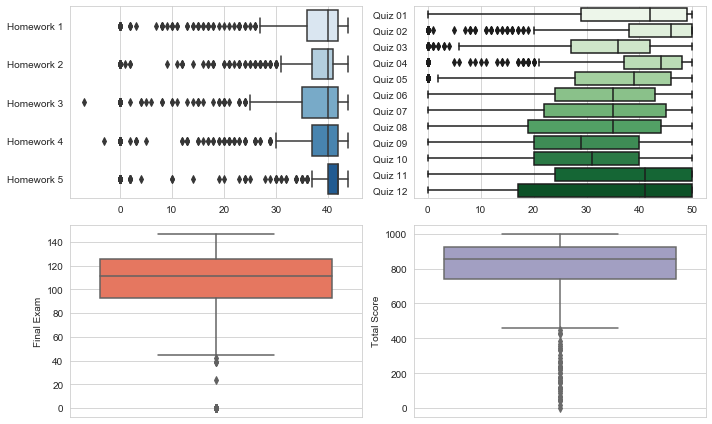

In [113]:
# Task 6: Charts
import seaborn as sns

homework_attributes = ['Homework 1', 'Homework 2',
       'Homework 3', 'Homework 4', 'Homework 5']
quiz_attributes = ['Quiz 01', 'Quiz 02', 'Quiz 03', 'Quiz 04', 'Quiz 05', 'Quiz 06',
       'Quiz 07', 'Quiz 08', 'Quiz 09', 'Quiz 10', 'Quiz 11', 'Quiz 12']
filled_df['Homework Average'] = filled_df[homework_attributes].sum(axis=1) / len(homework_attributes)
filled_df['Quiz Average'] = (filled_df[quiz_attributes].sum(axis=1) - filled_df['Drop Lowest Quiz 1'] - filled_df['Drop Lowest Quiz 2']) / (len(quiz_attributes)-2)

fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(221)
sns.boxplot(data=filled_df[homework_attributes], orient="h", palette="Blues",  ax=ax1)
ax2 = fig1.add_subplot(222)
sns.boxplot(data=filled_df[quiz_attributes], orient="h", palette="Greens", ax=ax2)
ax3 = fig1.add_subplot(223)
sns.boxplot(y=filled_df['Final Exam'], orient="v", palette="Reds", ax=ax3)
ax4 = fig1.add_subplot(224)
sns.boxplot(y=filled_df['Total Score'], orient="v", palette="Purples", ax=ax4)
fig1.tight_layout()
fig1.savefig('box_plots.pdf')

fig2 = plt.figure(figsize=(8, 8))
ax1 = fig2.add_subplot(221)
sns.distplot(filled_df['Homework Average'], kde=False, rug=True, ax=ax1)
ax2 = fig2.add_subplot(222)
sns.distplot(filled_df['Quiz Average'], kde=False, rug=True, ax=ax2)
ax3 = fig2.add_subplot(223)
sns.distplot(filled_df['Final Exam'], kde=False, rug=True, ax=ax3)
ax4 = fig2.add_subplot(224)
sns.distplot(filled_df['Total Score'], kde=False, rug=True, ax=ax4)
fig2.tight_layout()
fig2.savefig('histograms.pdf')

fig3 = plt.figure(figsize=(8, 8))
ax1 = fig3.add_subplot(221)
sns.scatterplot(x='Homework Average', y='Quiz Average', data=filled_df, ax=ax1)
ax2 = fig3.add_subplot(222)
sns.scatterplot(x='Homework Average', y='Total Score', hue="Total Score", size="Total Score", data=filled_df, ax=ax2)
ax3 = fig3.add_subplot(223)
sns.scatterplot(x='Quiz Average', y='Total Score', hue="Total Score", size="Total Score", data=filled_df, ax=ax3)
ax4 = fig3.add_subplot(224)
sns.scatterplot(x='Final Exam', y='Total Score', hue="Total Score", size="Total Score", data=filled_df, ax=ax4)
fig3.tight_layout()
fig3.savefig('scatter_plots.pdf')


In [106]:
# Task 7: Outlier Detection
from scipy import stats
statistics_attributes = ['Homework 1', 'Homework 2',
       'Homework 3', 'Homework 4', 'Homework 5', 'Peer Evaluations', 
       'Quiz 01', 'Quiz 02', 'Quiz 03', 'Quiz 04', 'Quiz 05', 'Quiz 06',
       'Quiz 07', 'Quiz 08', 'Quiz 09', 'Quiz 10', 'Quiz 11', 'Quiz 12',
       'Drop Lowest Quiz 1', 'Drop Lowest Quiz 2',
       'Final Exam', 'Total Score']
z = np.abs(stats.zscore(df[statistics_attributes]))
print(z)
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]


[[       nan        nan        nan ... 0.02719724        nan 0.22636769]
 [       nan        nan        nan ... 0.48134951        nan 0.13704683]
 [       nan        nan        nan ... 0.19075137        nan 0.18868026]
 ...
 [       nan        nan        nan ... 0.19075137        nan 0.30712647]
 [       nan        nan        nan ... 0.11810183        nan 0.0863858 ]
 [       nan        nan        nan ... 0.60839354        nan 0.59785809]]


In [109]:
# Task 8: Correlation analysis
correlation_analysis_scores = ['Homework Average', 'Quiz Average', 'Peer Evaluations', 'Final Exam']
correlation = filled_df[correlation_analysis_scores].corr()

print(' & '.join(correlation_analysis_scores), '\\\\','\\midrule')
for g in correlation_analysis_scores:
    d = correlation[g].tolist()
    d = [f'{v:.3f}' for v in d]
    d = [g]+d 
    print(' & '.join(d), '\\\\')
    
print(correlation)
# df[correlation_analysis_scores].corr(method='spearman')

Homework Average & Quiz Average & Peer Evaluations & Final Exam \\ \midrule
Homework Average & 1.000 & 0.672 & 0.652 & 0.611 \\
Quiz Average & 0.672 & 1.000 & 0.474 & 0.742 \\
Peer Evaluations & 0.652 & 0.474 & 1.000 & 0.639 \\
Final Exam & 0.611 & 0.742 & 0.639 & 1.000 \\
                  Homework Average  Quiz Average  Peer Evaluations  Final Exam
Homework Average          1.000000      0.672020          0.652267    0.611029
Quiz Average              0.672020      1.000000          0.474036    0.742162
Peer Evaluations          0.652267      0.474036          1.000000    0.639088
Final Exam                0.611029      0.742162          0.639088    1.000000
